**Installing dependencies**

In [1]:

!pip install scikit-plot

**Importing libraries**

In [2]:
import math
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import joblib
import seaborn as sns #visualization
import json
import pickle #saving the model
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from statistics import stdev
from warnings import simplefilter

import warnings
warnings.filterwarnings('ignore')


In [3]:
#reading the .xlsx dataset in to the dataframe
df1 = pd.read_excel("/kaggle/input/malefertilitydataset/DIB dataset and codebook.xlsx")

In [4]:
df1.head()

,ID,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,...,JS33,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6
0,1,2,1,1,1,1,1,6,1,4,...,5,4,4,4,4,4,4,2,5,5
1,2,2,1,1,1,2,1,6,1,3,...,5,3,5,5,5,5,4,5,5,5
2,3,2,1,1,1,2,1,6,1,5,...,5,5,5,5,5,5,5,5,5,5
3,4,3,1,1,2,1,2,5,1,5,...,4,5,5,5,2,2,2,4,5,5
4,5,2,1,1,1,1,1,6,1,3,...,5,5,5,5,5,5,5,5,5,5


In [5]:
df1.shape

(309, 95)

In [6]:
df1.columns

Index(['ID', 'Age', 'Religion', 'Ethnicity', 'Marital status',
       'Marriage period', 'No. of children', 'Educational level',
       'Employment status', 'Working period', 'Household income',
       'Sperm quality', 'OS1', 'OS2', 'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8',
       'OS9', 'OS10', 'OS11', 'OS12', 'OS13', 'OS14', 'OS15', 'OS16', 'OS17',
       'OS18', 'OS19', 'OS20', 'OS21', 'OS22', 'OS23', 'OS24', 'OS25', 'OS26',
       'OS27', 'OS28', 'OS29', 'OS30', 'OS31', 'OS32', 'OS33', 'OS34', 'OS35',
       'OS36', 'OS37', 'OS38', 'OS39', 'OS40', 'OS41', 'JS1', 'JS2', 'JS3',
       'JS4', 'JS5', 'JS6', 'JS7', 'JS8', 'JS9', 'JS10', 'JS11', 'JS12',
       'JS13', 'JS14', 'JS15', 'JS16', 'JS17', 'JS18', 'JS19', 'JS20', 'JS21',
       'JS22', 'JS23', 'JS24', 'JS25', 'JS26', 'JS27', 'JS28', 'JS29', 'JS30',
       'JS31', 'JS32', 'JS33', 'JS34', 'JS35', 'JS36', 'JP1', 'JP2', 'JP3',
       'JP4', 'JP5', 'JP6'],
      dtype='object')

In [7]:
df1.nunique()

ID                309
Age                 5
Religion            4
Ethnicity           5
Marital status      2
                 ... 
JP2                 5
JP3                 4
JP4                 4
JP5                 5
JP6                 5
Length: 95, dtype: int64

# Exploratory Data Analysis (EDA)

In [8]:
#droping the column ID since it's not important
df2 = df1.drop(['ID'],axis=1)
df2.head()

,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,Household income,...,JS33,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6
0,2,1,1,1,1,1,6,1,4,7,...,5,4,4,4,4,4,4,2,5,5
1,2,1,1,1,2,1,6,1,3,4,...,5,3,5,5,5,5,4,5,5,5
2,2,1,1,1,2,1,6,1,5,7,...,5,5,5,5,5,5,5,5,5,5
3,3,1,1,2,1,2,5,1,5,10,...,4,5,5,5,2,2,2,4,5,5
4,2,1,1,1,1,1,6,1,3,5,...,5,5,5,5,5,5,5,5,5,5


In [9]:
df2.isnull().any()

Age                False
Religion           False
Ethnicity          False
Marital status     False
Marriage period    False
                   ...  
JP2                False
JP3                False
JP4                False
JP5                False
JP6                False
Length: 94, dtype: bool

In [10]:
df2.isnull().sum()

Age                0
Religion           0
Ethnicity          0
Marital status     0
Marriage period    0
                  ..
JP2                0
JP3                0
JP4                0
JP5                0
JP6                0
Length: 94, dtype: int64

In [11]:
df2 = df2.dropna(how='any',axis=0)
df2.isnull().sum()

Age                0
Religion           0
Ethnicity          0
Marital status     0
Marriage period    0
                  ..
JP2                0
JP3                0
JP4                0
JP5                0
JP6                0
Length: 94, dtype: int64

In [12]:
df2.shape
df2.head(20)

,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,Household income,...,JS33,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6
0,2,1,1,1,1,1,6,1,4,7,...,5,4,4,4,4,4,4,2,5,5
1,2,1,1,1,2,1,6,1,3,4,...,5,3,5,5,5,5,4,5,5,5
2,2,1,1,1,2,1,6,1,5,7,...,5,5,5,5,5,5,5,5,5,5
3,3,1,1,2,1,2,5,1,5,10,...,4,5,5,5,2,2,2,4,5,5
4,2,1,1,1,1,1,6,1,3,5,...,5,5,5,5,5,5,5,5,5,5
5,2,1,1,1,2,1,7,1,4,5,...,5,5,5,5,5,5,5,5,5,5
6,2,1,1,1,1,1,6,1,5,4,...,4,2,2,4,4,4,4,4,4,4
7,2,1,1,1,2,1,7,1,4,1,...,5,5,5,3,5,5,5,5,5,1
8,3,1,1,2,3,1,6,1,5,1,...,4,4,5,4,5,5,4,5,4,5
9,3,1,1,1,2,1,5,1,5,5,...,4,3,3,2,3,3,2,2,2,2


In [13]:
df2.nunique()

Age                5
Religion           4
Ethnicity          5
Marital status     2
Marriage period    3
                  ..
JP2                5
JP3                4
JP4                4
JP5                5
JP6                5
Length: 94, dtype: int64

In [14]:
df2.rename(columns={'Marital status' : 'Marital_status',
                    'Marriage period' : 'Marriage_period',
                    'No. of children' : 'Num_of_children',
                    'Educational level' : 'Educational_level',
                    'Employment status' : 'Employment_status',
                    'Working period' : 'Working_period',
                    'Household income' : 'Household_income',
                    'Sperm quality' : 'Sperm_quality',
                   },
          inplace=True)

In [15]:
df2.head()

,Age,Religion,Ethnicity,Marital_status,Marriage_period,Num_of_children,Educational_level,Employment_status,Working_period,Household_income,...,JS33,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6
0,2,1,1,1,1,1,6,1,4,7,...,5,4,4,4,4,4,4,2,5,5
1,2,1,1,1,2,1,6,1,3,4,...,5,3,5,5,5,5,4,5,5,5
2,2,1,1,1,2,1,6,1,5,7,...,5,5,5,5,5,5,5,5,5,5
3,3,1,1,2,1,2,5,1,5,10,...,4,5,5,5,2,2,2,4,5,5
4,2,1,1,1,1,1,6,1,3,5,...,5,5,5,5,5,5,5,5,5,5


In [16]:
df2.Age.unique()

array([2, 3, 1, 4, 5])

In [17]:
df2.Religion.unique()

array([1, 3, 4, 2])

In [18]:
df2.Ethnicity.unique()

array([1, 3, 2, 5, 4])

In [19]:
df2.Marital_status.unique()

array([1, 2])

In [20]:
df2.Num_of_children.unique()

array([1, 2, 3])

In [21]:
df2.Marriage_period.unique()

array([1, 2, 3])

In [22]:
df2.Educational_level.unique()

array([6, 5, 7, 3, 9, 8, 4, 2])

In [23]:
df2.Employment_status.unique()

array([1, 3, 2])

In [24]:
df2.Household_income.unique()

array([ 7,  4, 10,  5,  1,  2,  6,  3,  8,  9])

In [25]:
df2.Working_period.unique()

array([4, 3, 5, 2, 1])

In [26]:
df2.describe()

,Age,Religion,Ethnicity,Marital_status,Marriage_period,Num_of_children,Educational_level,Employment_status,Working_period,Household_income,...,JS33,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,...,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,2.165049,1.084142,1.129450,1.100324,1.883495,1.323625,6.019417,1.042071,4.433657,5.132686,...,3.980583,3.922330,3.789644,3.705502,4.207120,4.194175,4.090615,4.042071,4.239482,4.388350
std,0.604589,0.433246,0.560676,0.300918,0.772510,0.557236,1.164802,0.257694,0.882532,2.599675,...,0.833323,0.911927,0.979211,1.032273,0.722425,0.650548,0.754774,0.861238,0.765062,0.682333
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,4.000000,3.000000,...,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,6.000000,1.000000,5.000000,5.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,7.000000,1.000000,5.000000,7.000000,...,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,4.000000,5.000000,2.000000,3.000000,3.000000,9.000000,3.000000,5.000000,10.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Distributions

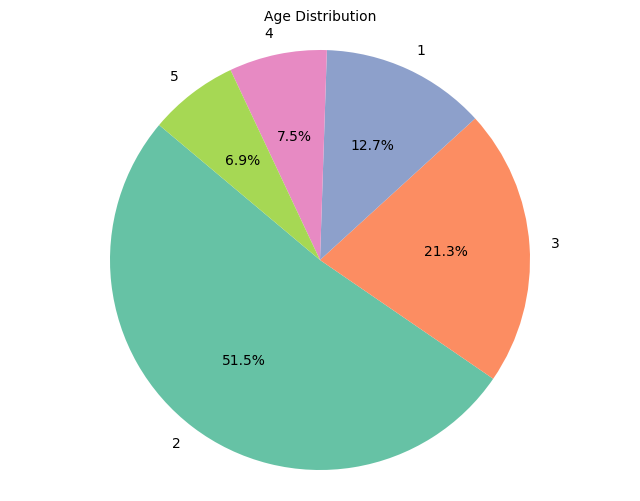

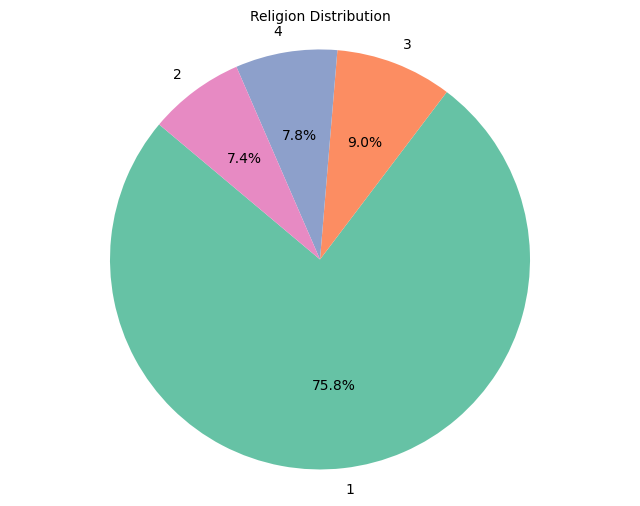

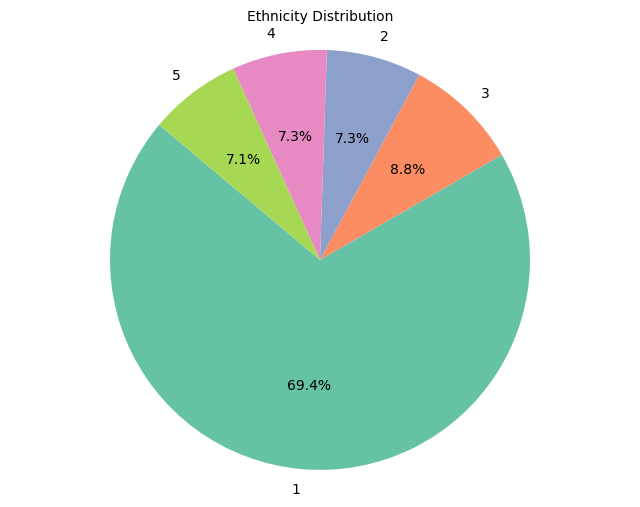

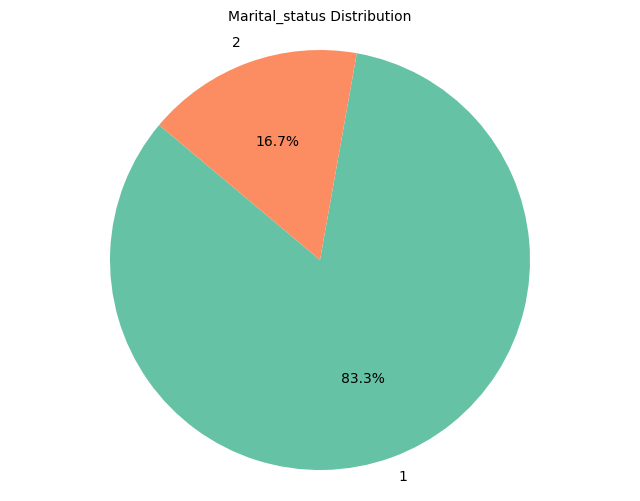

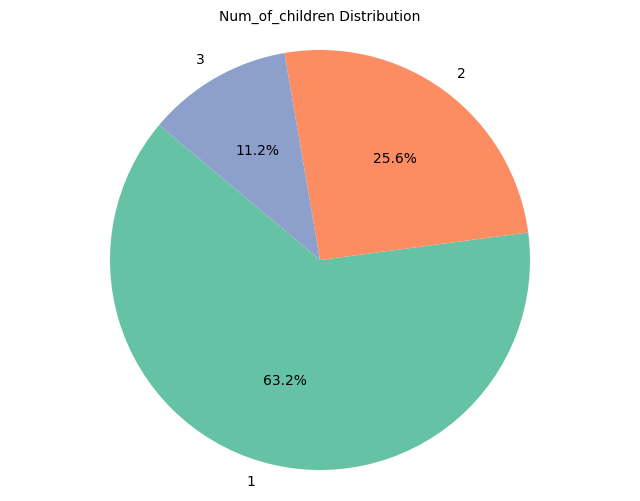

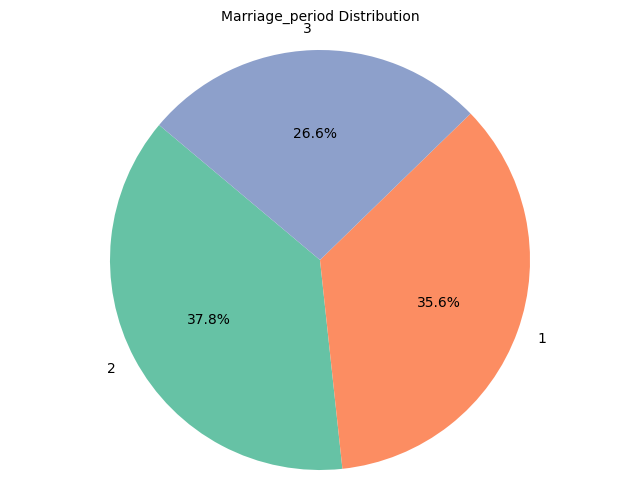

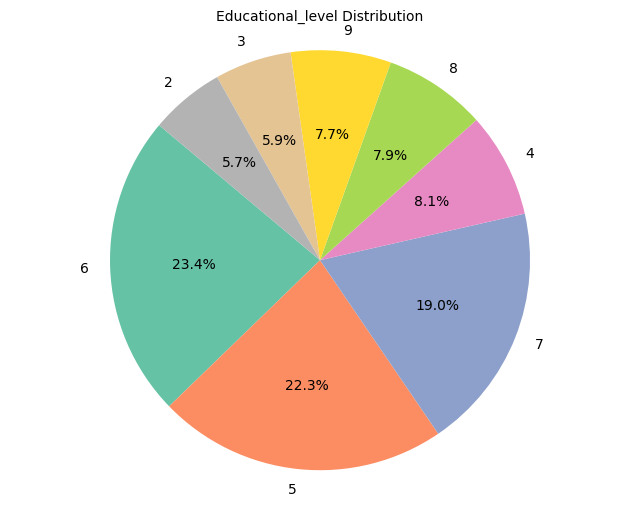

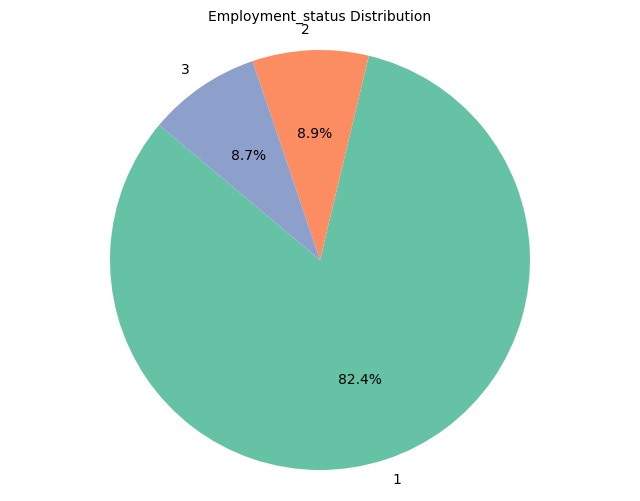

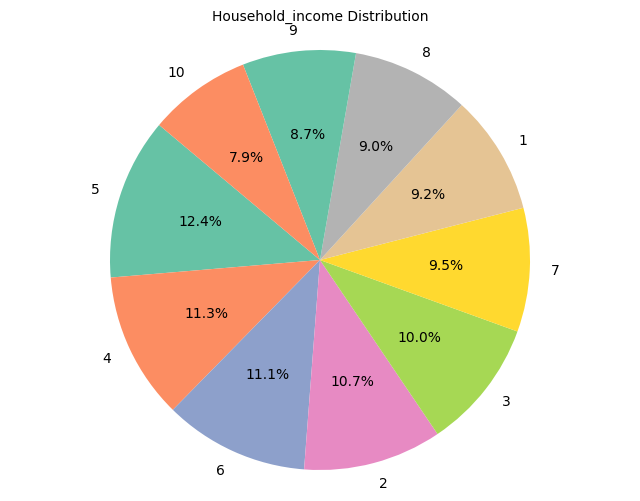

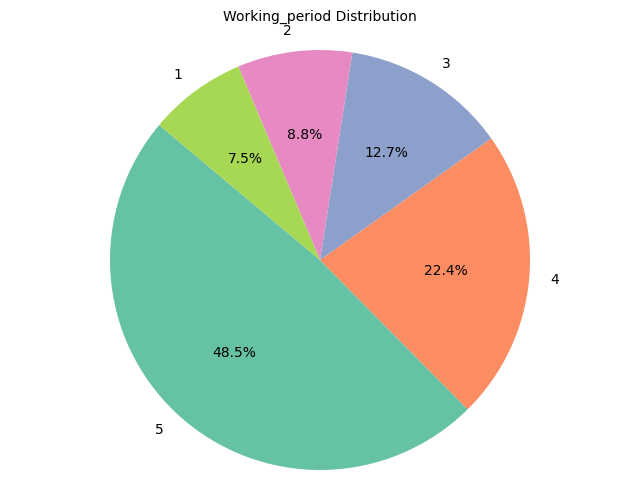

In [27]:
features = ['Age', 'Religion', 'Ethnicity', 'Marital_status', 'Num_of_children', 
            'Marriage_period', 'Educational_level', 'Employment_status', 'Household_income',
            'Working_period']

for f in features:
    plt.figure(figsize=(8, 6)) 

    # Calculate counts and convert to percentage
    counts = df2[f].value_counts(normalize=True) * 100

    # Plotting pie chart with percentage labels
    plt.pie(counts+10, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
    plt.title(f'{f} Distribution', fontsize=10) # Add a title to the plot

    # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.axis('equal')

    plt.show()


**Occupational Stress response**

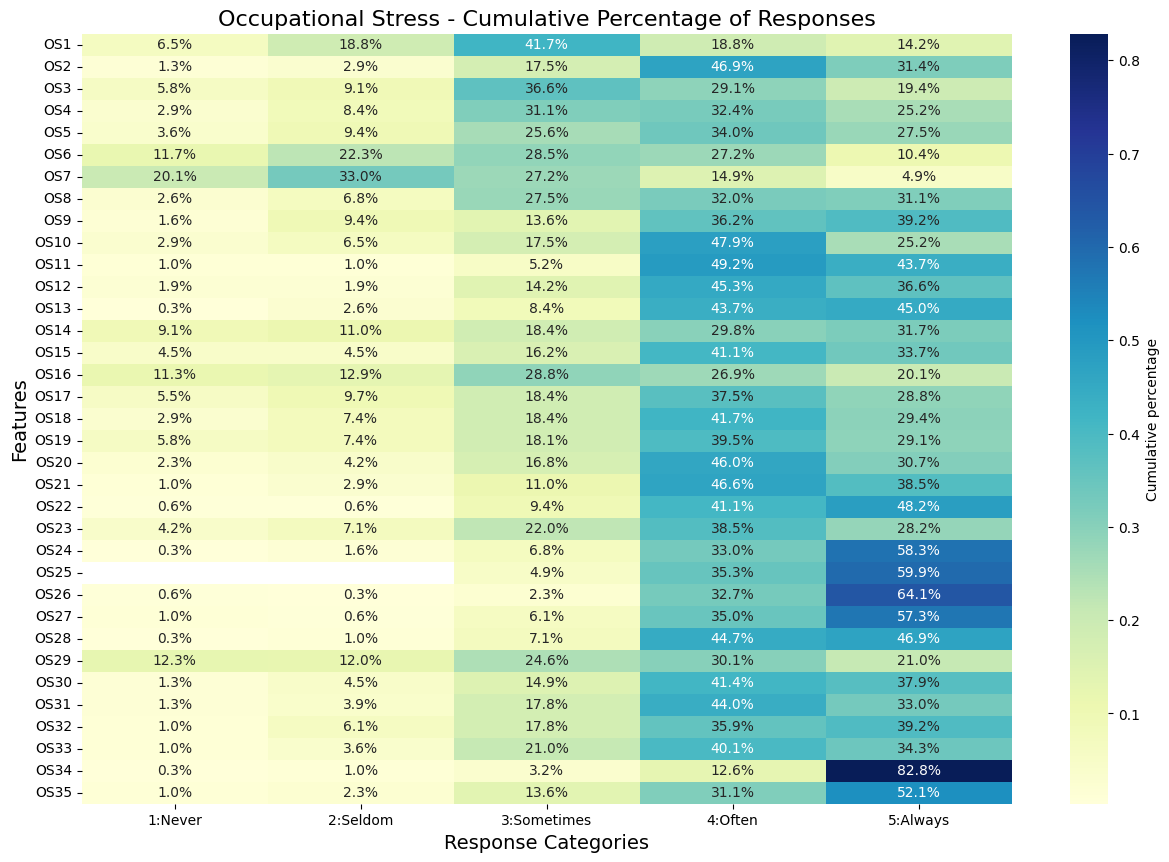

In [28]:
features = ['OS1', 'OS2', 'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8', 'OS9', 'OS10', 'OS11',
            'OS12', 'OS13', 'OS14', 'OS15', 'OS16', 'OS17', 'OS18', 'OS19', 'OS20', 'OS21',
            'OS22', 'OS23', 'OS24', 'OS25', 'OS26', 'OS27', 'OS28', 'OS29', 'OS30', 'OS31',
            'OS32', 'OS33', 'OS34', 'OS35']

response_categories = [1, 2, 3, 4, 5]  # Define categories in order

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series = df2[f].value_counts(normalize=True)
    count_series = count_series.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f] = count_series

# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T

# Set a larger figure size
plt.figure(figsize=(15, 10))

# Plot the heatmap with custom labels
sns.heatmap(counts_df, cmap='YlGnBu', annot=True, fmt=".1%", cbar_kws={'label': 'Cumulative percentage'},
            xticklabels=['1:Never', '2:Seldom', '3:Sometimes', '4:Often', '5:Always'])

plt.xlabel('Response Categories', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Occupational Stress - Cumulative Percentage of Responses', fontsize=16)

plt.show()


In [29]:
counts_df.head(10)

OS1,1,2,3,4,5
OS1,0.064725,0.187702,0.417476,0.187702,0.142395
OS2,0.012945,0.029126,0.174757,0.469256,0.313916
OS3,0.058252,0.090615,0.365696,0.291262,0.194175
OS4,0.029126,0.084142,0.310680,0.323625,0.252427
OS5,0.035599,0.093851,0.255663,0.339806,0.275081
OS6,0.116505,0.223301,0.284790,0.271845,0.103560
OS7,0.200647,0.330097,0.271845,0.148867,0.048544
OS8,0.025890,0.067961,0.275081,0.320388,0.310680
OS9,0.016181,0.093851,0.135922,0.362460,0.391586
OS10,0.029126,0.064725,0.174757,0.478964,0.252427


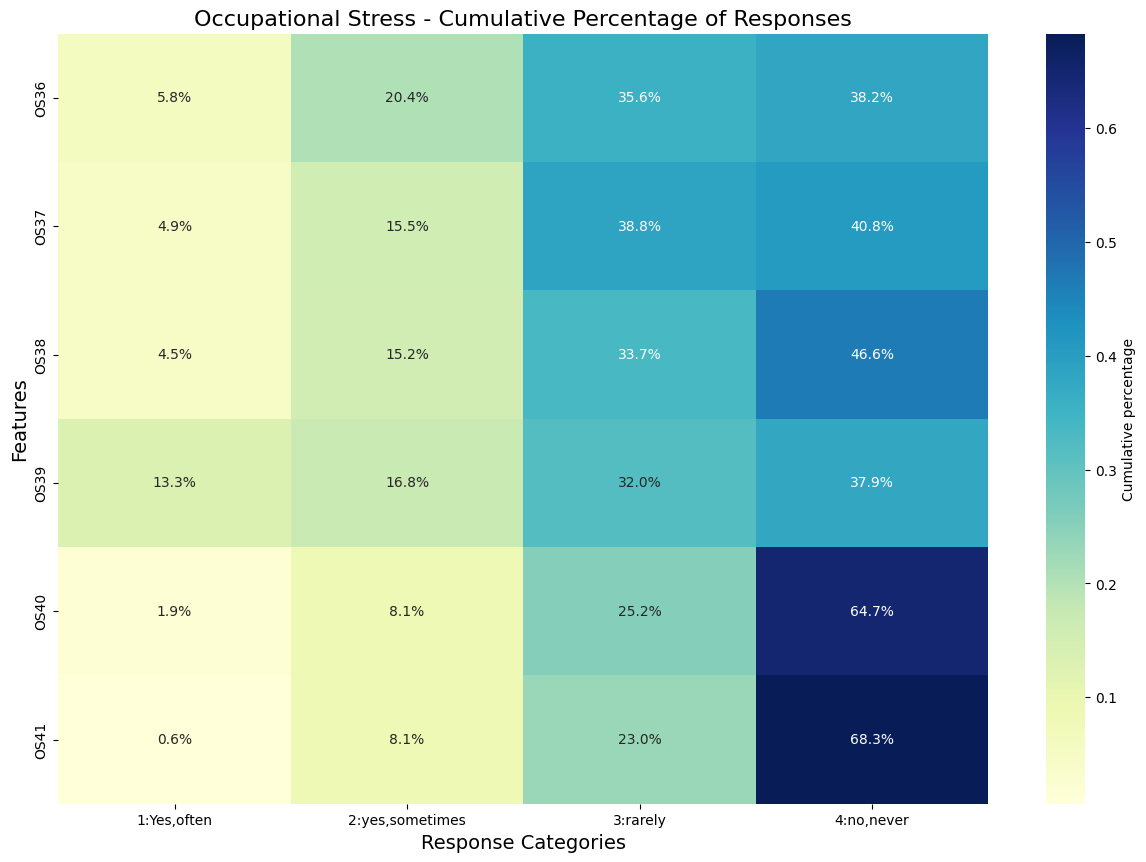

In [30]:
features = ['OS36', 'OS37', 'OS38', 'OS39', 'OS40', 'OS41']

response_categories = [1, 2, 3, 4]  # Define categories in order

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series = df2[f].value_counts(normalize=True)
    count_series = count_series.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f] = count_series

# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T

# Set a larger figure size
plt.figure(figsize=(15, 10))

# Plot the heatmap with custom labels
sns.heatmap(counts_df, cmap='YlGnBu', annot=True, fmt=".1%", cbar_kws={'label': 'Cumulative percentage'},
            xticklabels=['1:Yes,often', '2:yes,sometimes', '3:rarely', '4:no,never'])

plt.xlabel('Response Categories', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Occupational Stress - Cumulative Percentage of Responses', fontsize=16)

plt.show()


In [31]:
counts_df.head(6)

OS36,1,2,3,4
OS36,0.058252,0.203883,0.355987,0.381877
OS37,0.048544,0.155340,0.388350,0.407767
OS38,0.045307,0.152104,0.336570,0.466019
OS39,0.132686,0.168285,0.320388,0.378641
OS40,0.019417,0.080906,0.252427,0.647249
OS41,0.006472,0.080906,0.229773,0.682848


**Job satisfection response**

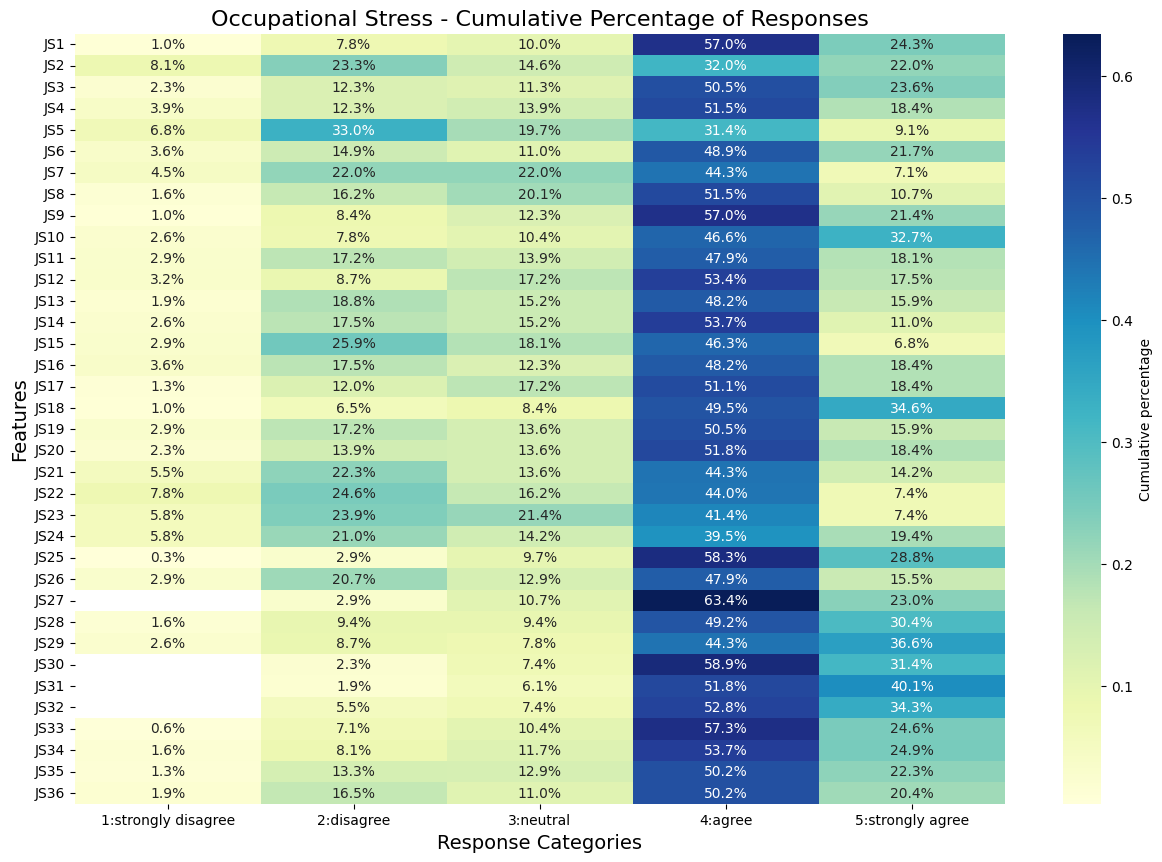

In [32]:
features = ['JS1', 'JS2', 'JS3', 'JS4', 'JS5', 'JS6', 'JS7', 'JS8', 'JS9', 'JS10', 'JS11',
            'JS12', 'JS13', 'JS14', 'JS15', 'JS16', 'JS17', 'JS18', 'JS19', 'JS20', 'JS21',
            'JS22', 'JS23', 'JS24', 'JS25', 'JS26', 'JS27', 'JS28', 'JS29', 'JS30', 'JS31',
            'JS32', 'JS33', 'JS34', 'JS35', 'JS36']

response_categories = [1, 2, 3, 4, 5]  # Define categories in order

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series = df2[f].value_counts(normalize=True)
    count_series = count_series.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f] = count_series

# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T

# Set a larger figure size
plt.figure(figsize=(15, 10))

# Plot the heatmap with custom labels
sns.heatmap(counts_df, cmap='YlGnBu', annot=True, fmt=".1%", cbar_kws={'label': 'Cumulative percentage'},
            xticklabels=['1:strongly disagree', '2:disagree', '3:neutral', '4:agree', '5:strongly agree'])

plt.xlabel('Response Categories', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Occupational Stress - Cumulative Percentage of Responses', fontsize=16)

plt.show()


In [33]:
counts_df.head(10)

JS1,1,2,3,4,5
JS1,0.009709,0.077670,0.100324,0.569579,0.242718
JS2,0.080906,0.233010,0.145631,0.320388,0.220065
JS3,0.022654,0.122977,0.113269,0.504854,0.236246
JS4,0.038835,0.122977,0.139159,0.514563,0.184466
JS5,0.067961,0.330097,0.197411,0.313916,0.090615
JS6,0.035599,0.148867,0.110032,0.488673,0.216828
JS7,0.045307,0.220065,0.220065,0.443366,0.071197
JS8,0.016181,0.161812,0.200647,0.514563,0.106796
JS9,0.009709,0.084142,0.122977,0.569579,0.213592
JS10,0.025890,0.077670,0.103560,0.466019,0.326861


**Job Performance Response**

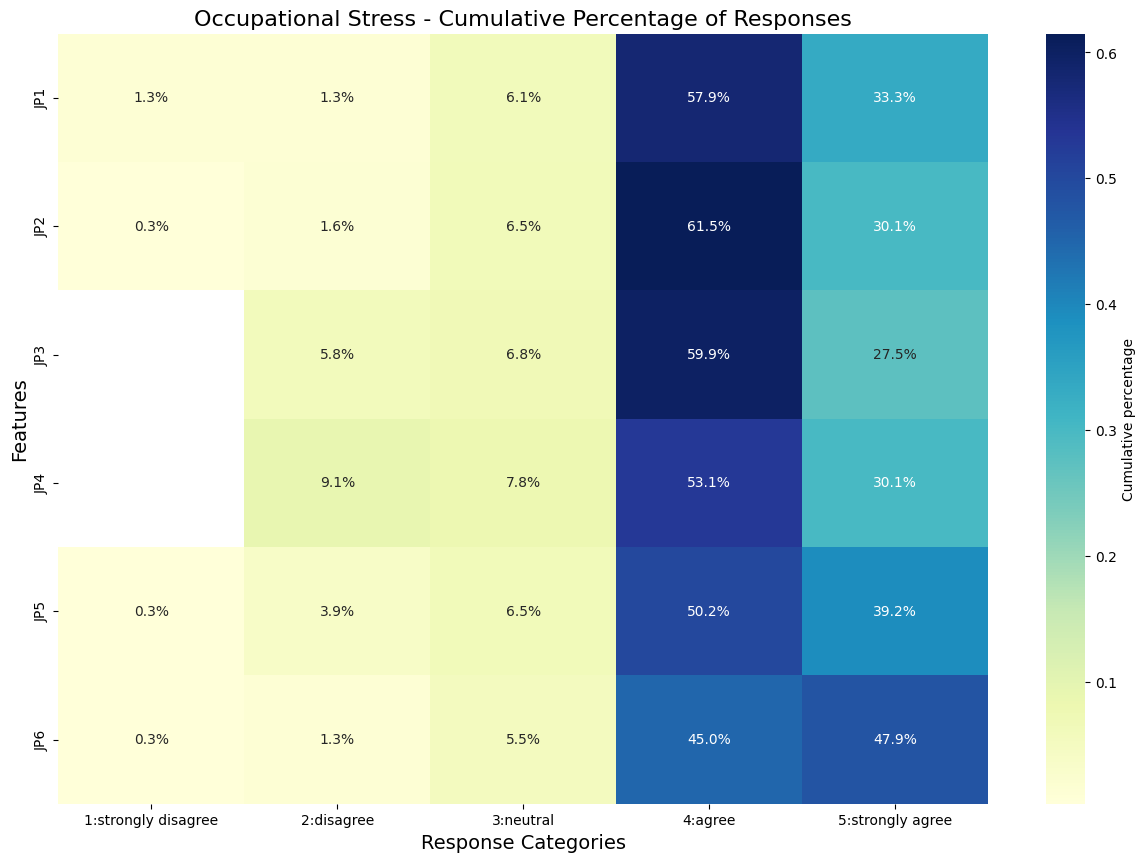

In [34]:
features = ['JP1', 'JP2', 'JP3', 'JP4', 'JP5', 'JP6']

response_categories = [1, 2, 3, 4, 5]  # Define categories in order

# Create an empty DataFrame to store the counts for each feature
counts_df = pd.DataFrame()

# Calculate the counts for each feature and store them in counts_df
for f in features:
    count_series = df2[f].value_counts(normalize=True)
    count_series = count_series.reindex(pd.Categorical(response_categories, categories=response_categories, ordered=True))
    counts_df[f] = count_series

# Transpose the DataFrame so that the features are on the X-axis and the counts are on the Y-axis
counts_df = counts_df.T

# Set a larger figure size
plt.figure(figsize=(15, 10))

# Plot the heatmap with custom labels
sns.heatmap(counts_df, cmap='YlGnBu', annot=True, fmt=".1%", cbar_kws={'label': 'Cumulative percentage'},
            xticklabels=['1:strongly disagree', '2:disagree', '3:neutral', '4:agree', '5:strongly agree'])

plt.xlabel('Response Categories', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Occupational Stress - Cumulative Percentage of Responses', fontsize=16)

plt.show()


In [35]:
counts_df.head(6)

JP1,1,2,3,4,5
JP1,0.012945,0.012945,0.061489,0.579288,0.333333
JP2,0.003236,0.016181,0.064725,0.614887,0.300971
JP3,NaN,0.058252,0.067961,0.598706,0.275081
JP4,NaN,0.090615,0.077670,0.530744,0.300971
JP5,0.003236,0.038835,0.064725,0.501618,0.391586
JP6,0.003236,0.012945,0.055016,0.449838,0.478964


# DATA PREPROCESSING

In [36]:
#Merging OS columns

df2['OS'] = df2['OS1'] + df2['OS2'] + df2['OS3'] + df2['OS4'] 
+ df2['OS5'] + df2['OS6'] +   df2['OS7'] + df2['OS8'] + df2['OS9']
+ df2['OS10'] + df2['OS11'] + df2['OS12'] + df2['OS13'] + df2['OS14'] 
+ df2['OS15'] + df2['OS16'] + df2['OS17'] + df2['OS18'] + df2['OS19']
+ df2['OS20'] + df2['OS21'] + df2['OS22'] + df2['OS23'] + df2['OS24']
+ df2['OS25'] + df2['OS26'] + df2['OS27'] + df2['OS28'] + df2['OS29']
+ df2['OS30'] + df2['OS31'] + df2['OS32'] + df2['OS33'] + df2['OS34']
+ df2['OS35'] + df2['OS36'] + df2['OS37'] + df2['OS38'] + df2['OS39']
+ df2['OS40'] + df2['OS41']

0      8
1      6
2      8
3      6
4      8
      ..
304    8
305    4
306    6
307    8
308    6
Length: 309, dtype: int64

In [37]:
#Merging JS columns

df2['JS'] = df2['JS1'] + df2['JS2'] + df2['JS3'] + df2['JS4'] 
+ df2['JS5'] + df2['JS6'] +   df2['JS7'] + df2['JS8'] + df2['JS9']
+ df2['JS10'] + df2['JS11'] + df2['JS12'] + df2['JS13'] + df2['JS14'] 
+ df2['JS15'] + df2['JS16'] + df2['JS17'] + df2['JS18'] + df2['JS19']
+ df2['JS20'] + df2['JS21'] + df2['JS22'] + df2['JS23'] + df2['JS24']
+ df2['JS25'] + df2['JS26'] + df2['JS27'] + df2['JS28'] + df2['JS29']
+ df2['JS30'] + df2['JS31'] + df2['JS32'] + df2['JS33'] + df2['JS34']
+ df2['JS35'] + df2['JS36']

0       8
1      10
2      10
3      10
4      10
       ..
304     8
305     4
306     9
307     4
308     8
Length: 309, dtype: int64

In [38]:
#Merging JP columns

df2['JP'] = df2['JP1'] + df2['JP2'] + df2['JP3'] + df2['JP4'] 
+ df2['JP5'] + df2['JP6'] 

0      10
1      10
2      10
3      10
4      10
       ..
304    10
305     8
306    10
307     9
308    10
Length: 309, dtype: int64

In [39]:
def classify_sperm(row):
    if '1' in str(row['Sperm_quality']):
        return 'Healthy'
    else:
        return 'Unhealthy'

df2['Sperm_class'] = df2.apply(classify_sperm, axis=1)

In [40]:
label_encoder = LabelEncoder()
df2.loc[:, 'encoded_SC'] = label_encoder.fit_transform(df2['Sperm_class'])

In [41]:
selected_columns = ['Age', 'Religion', 'Ethnicity', 'Marital_status',
                    'Num_of_children', 'Marriage_period', 'Educational_level', 
                    'Employment_status', 'Household_income', 'Working_period',
                    'OS', 'JS', 'JP', 'Sperm_class', 'encoded_SC']

# Create a new DataFrame with selected columns
df3 = df2[selected_columns]

In [42]:
df3

,Age,Religion,Ethnicity,Marital_status,Num_of_children,Marriage_period,Educational_level,Employment_status,Household_income,Working_period,OS,JS,JP,Sperm_class,encoded_SC
0,2,1,1,1,1,1,6,1,7,4,13,17,14,Unhealthy,1
1,2,1,1,1,1,2,6,1,4,3,17,10,19,Healthy,0
2,2,1,1,1,1,2,6,1,7,5,14,20,20,Healthy,0
3,3,1,1,2,2,1,5,1,10,5,9,19,10,Healthy,0
4,2,1,1,1,1,1,6,1,5,3,20,20,20,Healthy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,4,1,1,2,2,2,6,1,7,5,16,16,20,Unhealthy,1
305,2,1,1,1,2,2,9,1,8,5,7,11,14,Healthy,0
306,2,1,1,1,1,3,6,1,2,5,12,18,20,Healthy,0
307,3,1,1,2,3,1,5,1,2,5,15,6,16,Healthy,0


**Boxplot**

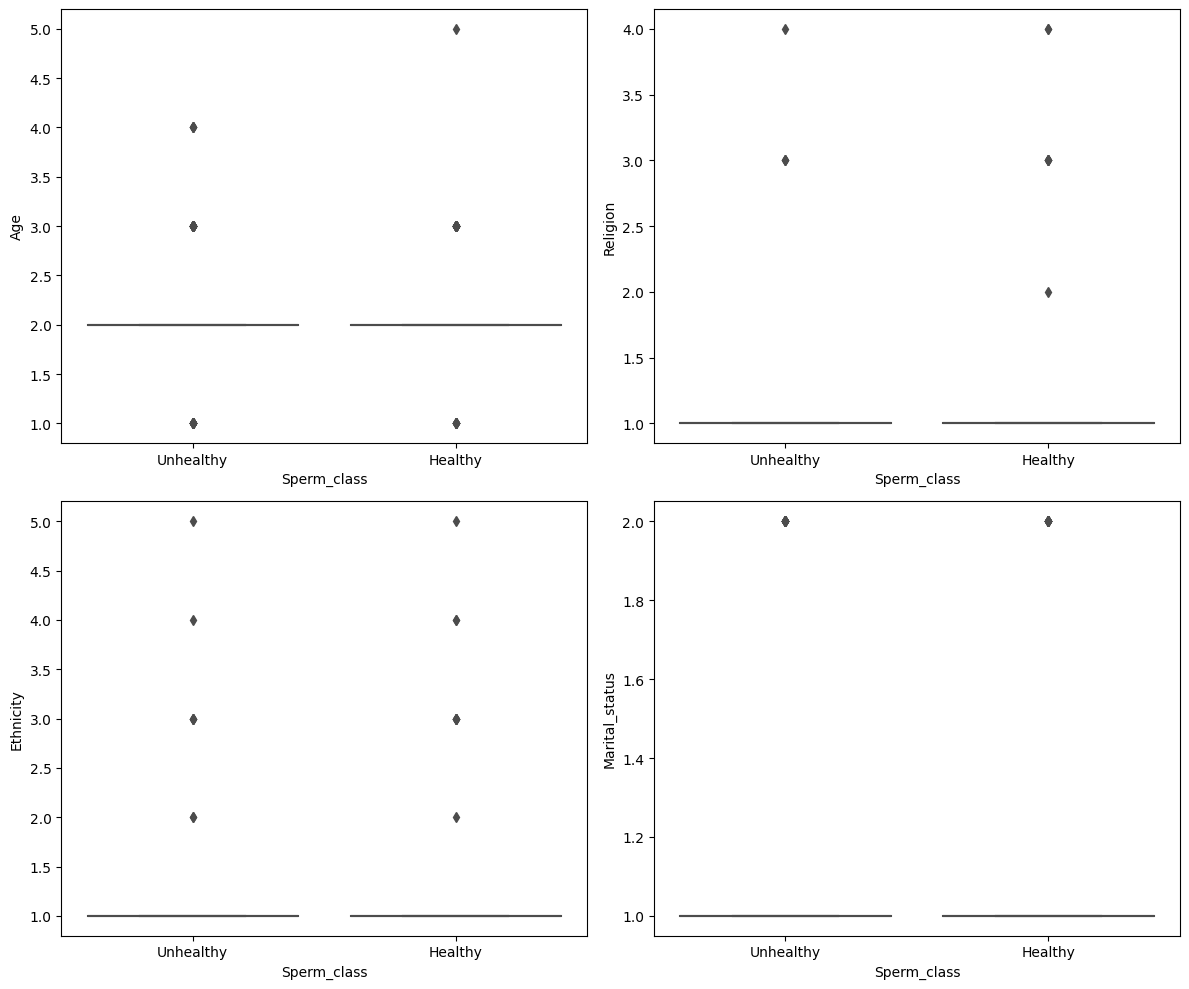

In [43]:
# Define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create boxplots for Age, Religion, Ethnicity, and Marital_status against Sperm_class
sns.boxplot(data=df3, x='Sperm_class', y='Age', ax=axes[0, 0], palette={'Unhealthy': '#ff0000', 'Healthy': '#00ff00'})
sns.boxplot(data=df3, x='Sperm_class', y='Religion', ax=axes[0, 1], palette={'Unhealthy': '#ff0000', 'Healthy': '#00ff00'})
sns.boxplot(data=df3, x='Sperm_class', y='Ethnicity', ax=axes[1, 0], palette={'Unhealthy': '#ff0000', 'Healthy': '#00ff00'})
sns.boxplot(data=df3, x='Sperm_class', y='Marital_status', ax=axes[1, 1], palette={'Unhealthy': '#ff0000', 'Healthy': '#00ff00'})

# Adjust layout
plt.tight_layout()

plt.show()


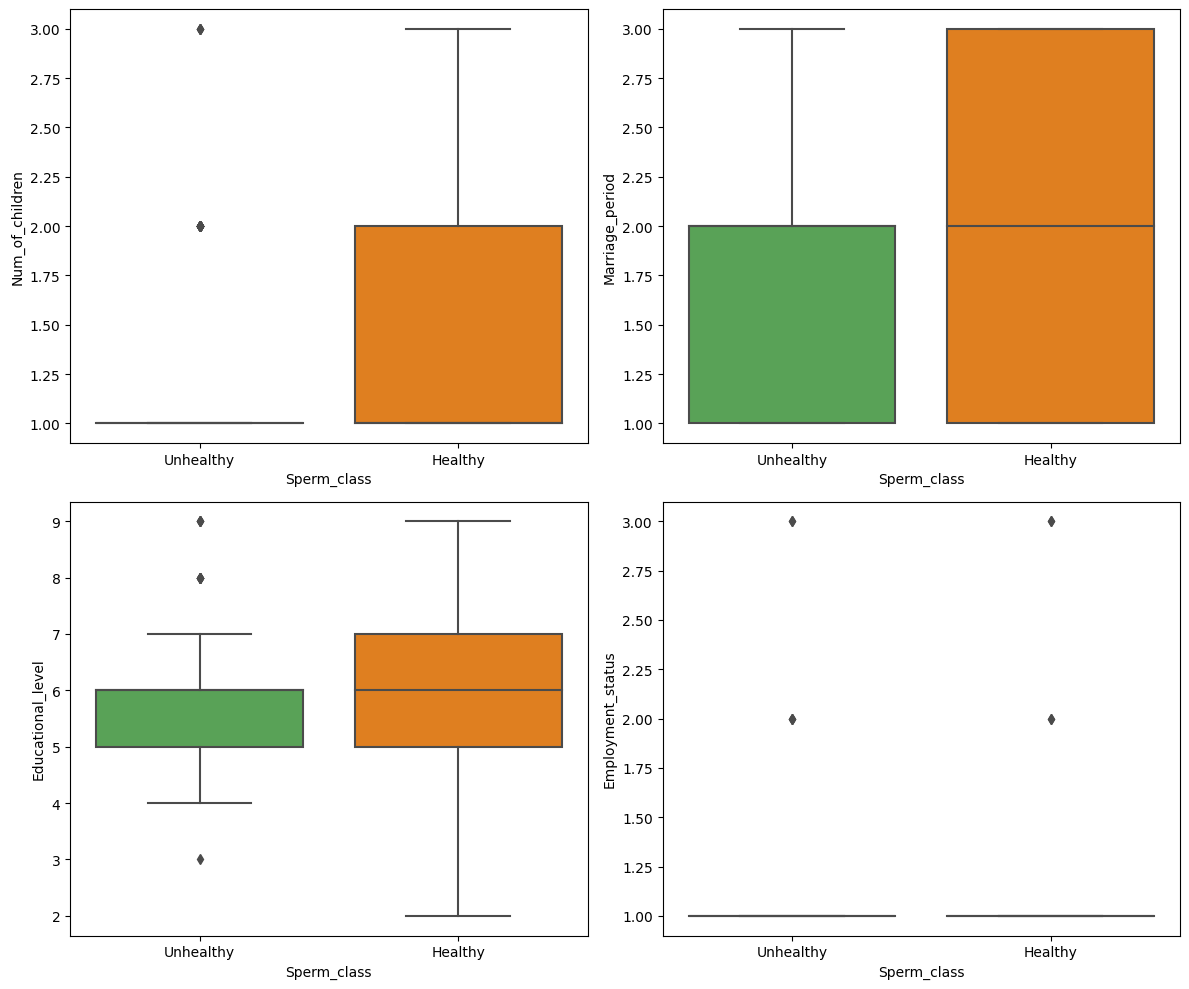

In [44]:
# Define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))



sns.boxplot(data=df3, x='Sperm_class', y='Num_of_children', ax=axes[0, 0], 
            palette={'Unhealthy': '#4daf4a', 'Healthy': '#ff7f00'})
sns.boxplot(data=df3, x='Sperm_class', y='Marriage_period', ax=axes[0, 1], 
            palette={'Unhealthy': '#4daf4a', 'Healthy': '#ff7f00'})
sns.boxplot(data=df3, x='Sperm_class', y='Educational_level', ax=axes[1, 0], 
            palette={'Unhealthy': '#4daf4a', 'Healthy': '#ff7f00'})
sns.boxplot(data=df3, x='Sperm_class', y='Employment_status', ax=axes[1, 1], 
            palette={'Unhealthy': '#4daf4a', 'Healthy': '#ff7f00'})

# Adjust layout
plt.tight_layout()

plt.show()


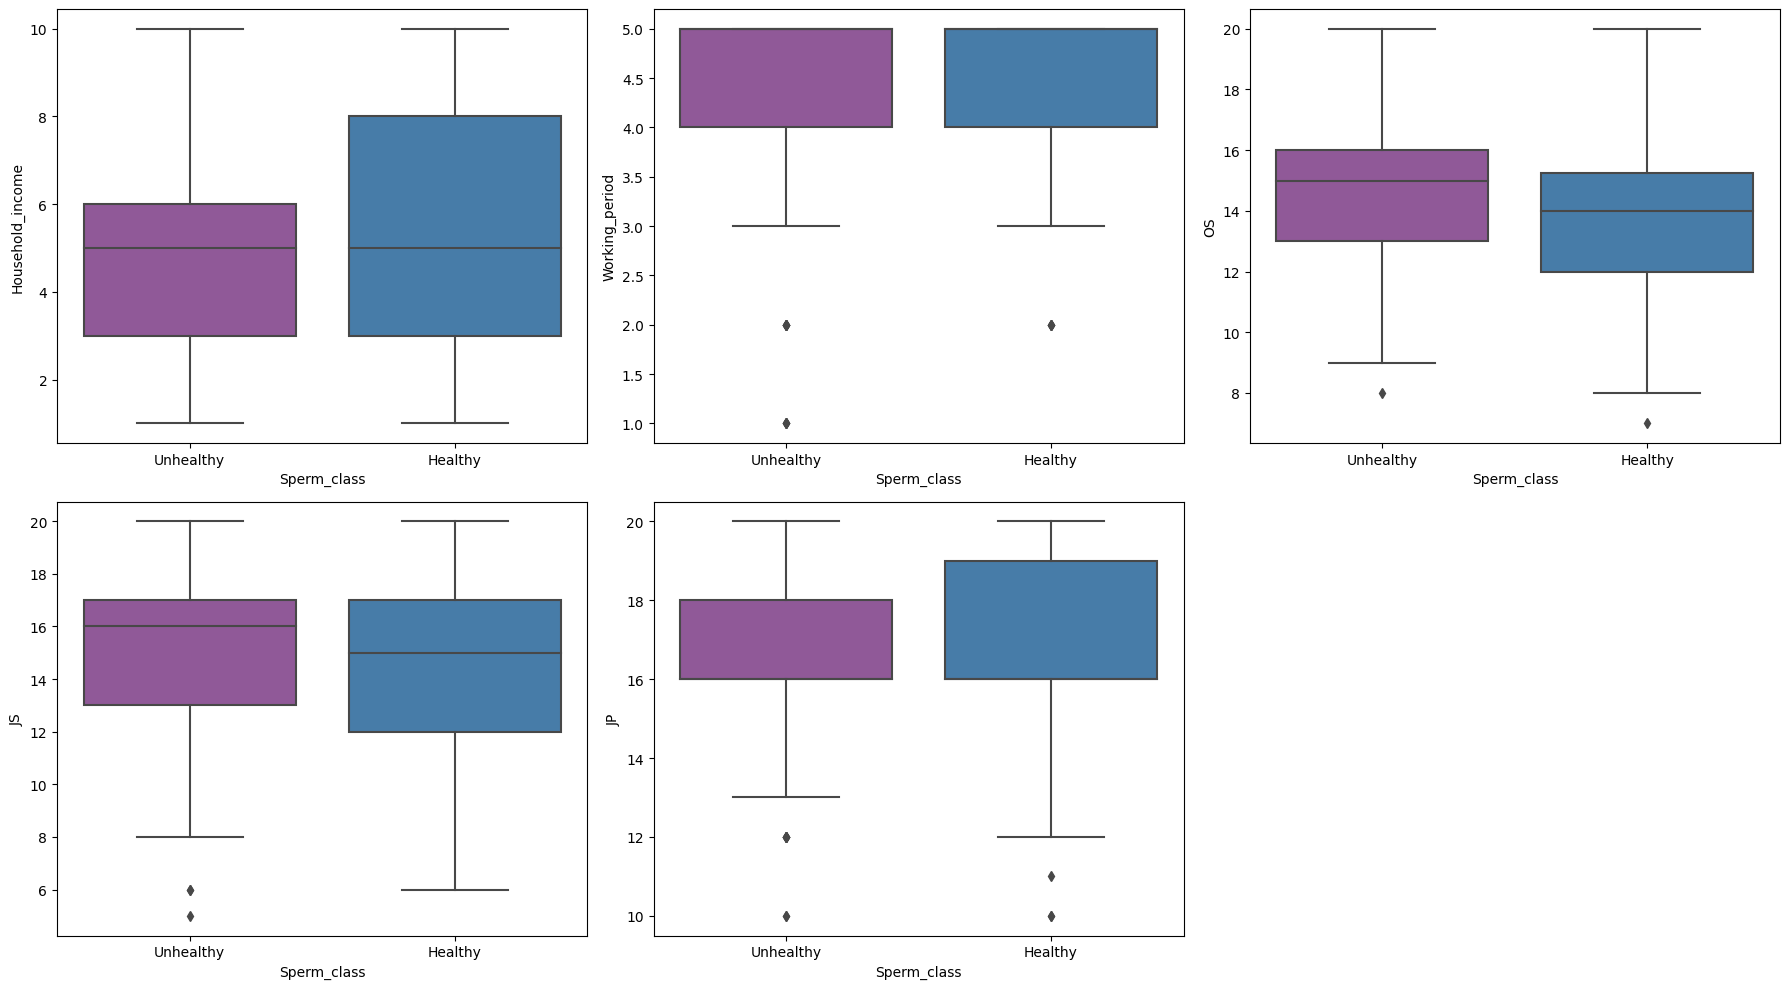

In [45]:
# Define plotting region (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.boxplot(data=df3, x='Sperm_class', y='Household_income', ax=axes[0, 0], 
            palette={'Unhealthy': '#984ea3', 'Healthy': '#377eb8'})
sns.boxplot(data=df3, x='Sperm_class', y='Working_period', ax=axes[0, 1],
            palette={'Unhealthy': '#984ea3', 'Healthy': '#377eb8'})
sns.boxplot(data=df3, x='Sperm_class', y='OS', ax=axes[0, 2], 
            palette={'Unhealthy': '#984ea3', 'Healthy': '#377eb8'})
sns.boxplot(data=df3, x='Sperm_class', y='JS', ax=axes[1, 0], 
            palette={'Unhealthy': '#984ea3', 'Healthy': '#377eb8'})
sns.boxplot(data=df3, x='Sperm_class', y='JP', ax=axes[1, 1], 
            palette={'Unhealthy': '#984ea3', 'Healthy': '#377eb8'})

# Remove the empty subplot in the last row and last column
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout()

plt.show()
